In [1]:
# Import the components from NeuroJack
from neurojack.env import BlackjackEnv
from neurojack.agent import DQNAgent, DoubleDQNAgent

c:\Users\rzvn1\scoop\persist\miniconda3\envs\test_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import logging
# --- Configure logging at the very beginning of your main script ---
# This sets up a basic console handler for all loggers
# You can adjust the level here, e.g., logging.INFO or logging.DEBUG
logging.basicConfig(level=logging.INFO, format='%(message)s')

In [3]:
# Initialize the custom Blackjack environment
env = BlackjackEnv()

# Observation and action space descriptions
print(f"Observation space: {env.observation_description}")
print(f"Action space: {env.action_description}")

# Dynamically derive state size and number of actions from env config
state_size = env.state_size
num_actions = env.num_actions
num_decks = env.num_decks
print(f"Derived state size: {state_size}, number of actions: {num_actions}")

Observation space: (player_current_sum, dealer_card_showing, usable_ace)
Action space: 0: Stand, 1: Hit
Derived state size: 3, number of actions: 2


In [4]:
# Define basic training parameters for the .fit method
training_params = {
    "num_episodes": 10000, # Number of games the model is trained for 
    "batch_size": 32, # Number of games in a mini-batch
    "log_interval": 1000 # How often the model evaluates it's performance
}

In [5]:
print("--- Training DQN Agent ---")

# Initialize with environment parameters
dqn_agent = DQNAgent(env)

# Start training
dqn_rewards_history = dqn_agent.fit(env, **training_params) # Pass basic params using **kwargs

--- Training DQN Agent ---


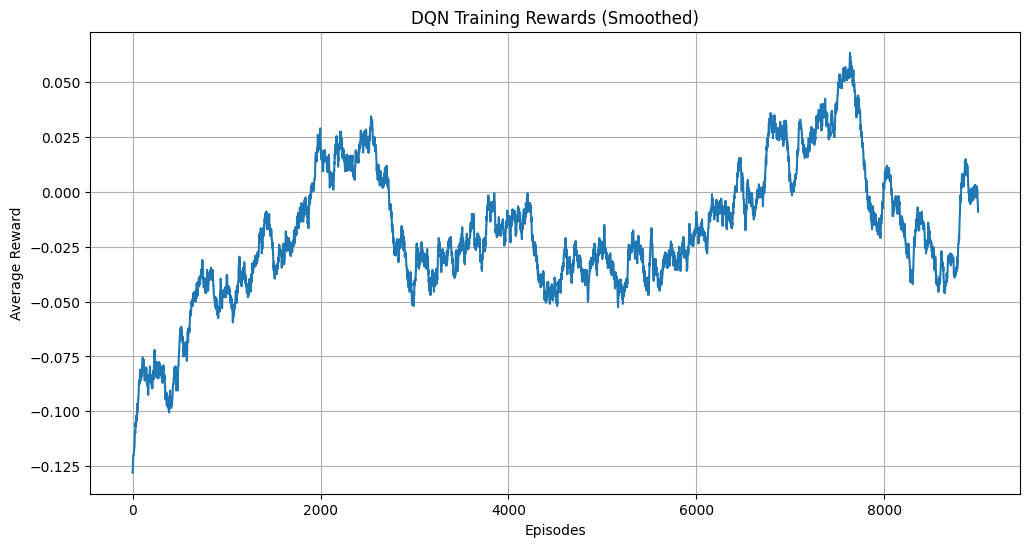

In [6]:
dqn_agent.plot_history(dqn_rewards_history)

In [7]:
print("\n--- Evaluating DQN Agent ---")
dqn_eval = dqn_agent.evaluate(env, num_eval_episodes=5000)
print(f"The average reward for the DQN Agent is {dqn_eval}")


--- Evaluating DQN Agent ---
The average reward for the DQN Agent is -0.0361


In [8]:
print("\n--- Training Double DQN Agent ---")

double_dqn_agent = DoubleDQNAgent(env)

# You can reuse training_params or define new ones
double_dqn_rewards_history = double_dqn_agent.fit(env, **training_params)

Double DQN initialized.



--- Training Double DQN Agent ---


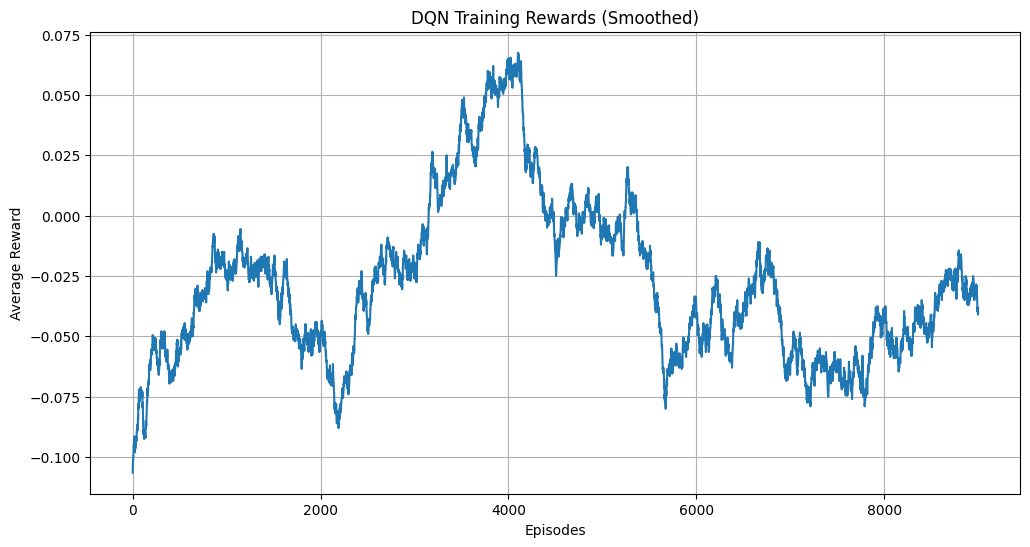

In [9]:
double_dqn_agent.plot_history(double_dqn_rewards_history)

In [10]:
print("\n--- Evaluating Double DQN Agent ---")
ddqn_eval = double_dqn_agent.evaluate(env, num_eval_episodes=5000)
print(f"The average reward for the Double DQN Agent is {ddqn_eval}")


--- Evaluating Double DQN Agent ---
The average reward for the Double DQN Agent is -0.0557
